We have performed data pre processing just as we did in the Train_Test jupyter notebook on the train dataset, which is Well 2 and Well 3 sheets in the excel file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df1 = pd.read_excel('Volve.xlsx', 'well 2')
df2 = pd.read_excel('Volve.xlsx', 'well 3')

data = pd.concat([df1, df2])

data.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,SH
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,UN
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,SH
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,UN
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,UN


## Checking for infinite, null or missing values

In [4]:
# No train test split needed since data from the well 2 and well 3 sheet will be used for training
data.isnull().any().any() ## are there nan values

False

In [5]:
## are there na values
data.isna().any().any()

False

In [6]:
data.describe()

,Depth,Well,GR,RT,RHOB,NPHI
count,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000
mean,3733.609380,14.357606,51.379917,4.292569,2.432688,0.207456
std,265.253354,0.479369,57.700965,14.524740,0.147662,0.104241
min,3178.500000,14.000000,3.655000,0.094000,1.805100,0.013500
25%,3542.000000,14.000000,17.433000,1.014000,2.311000,0.133600
50%,3747.500000,14.000000,34.083600,1.864900,2.459000,0.187900
75%,3950.500000,15.000000,71.846000,3.697700,2.550000,0.267500
max,4220.500000,15.000000,1567.590000,461.170000,3.149300,0.853200


## Useful features

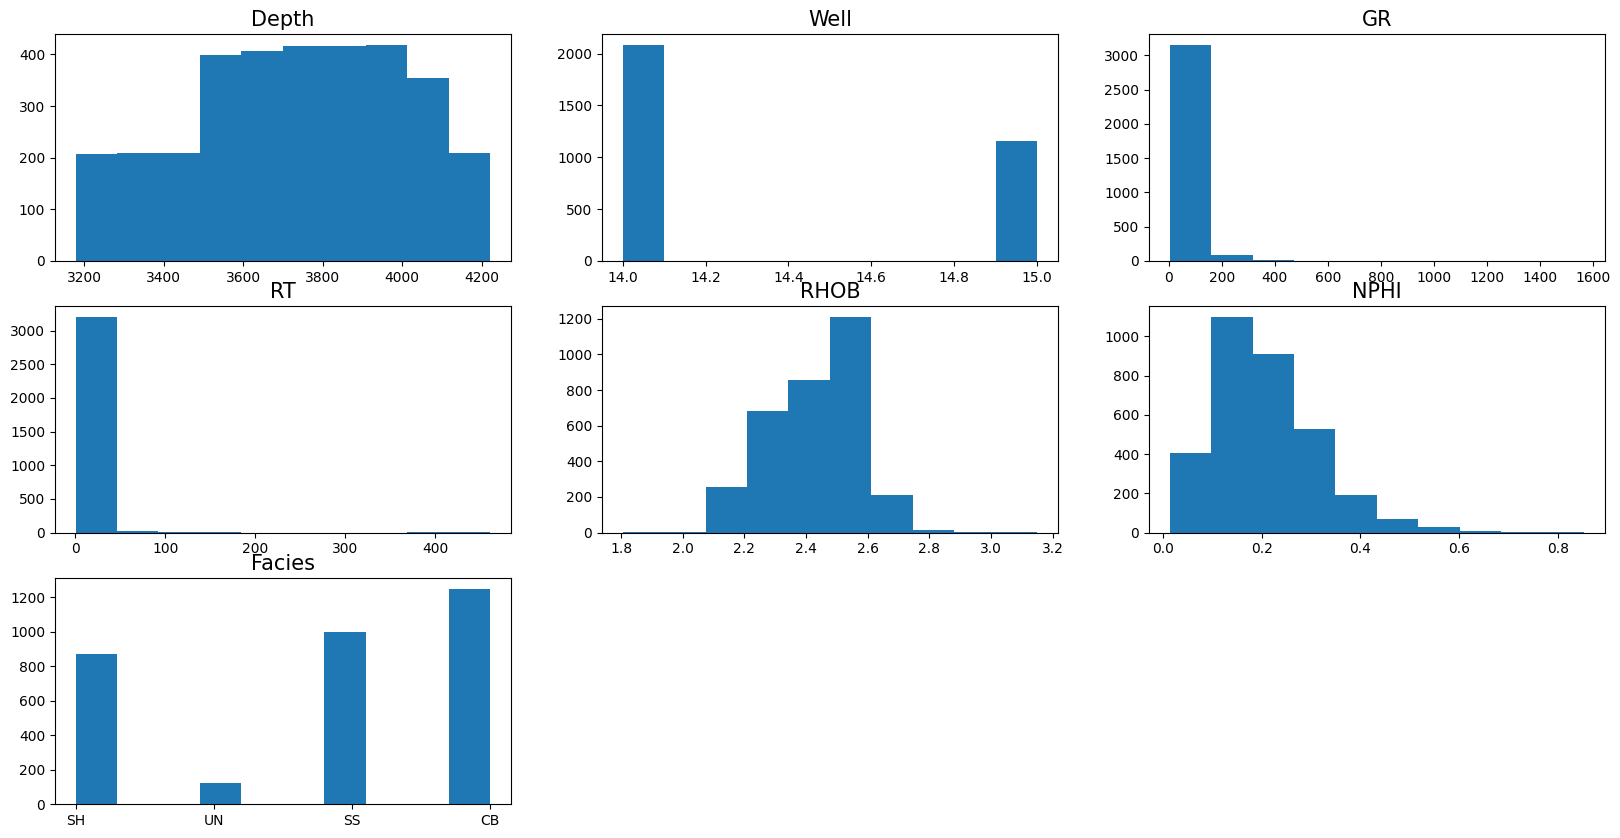

In [7]:
index = 1

plt.figure(figsize=(20,10))

for name in data.columns:
    plt.subplot(3,3,index)
    
    plt.hist(data.loc[:,name])
    
    plt.title(name, fontsize = 15)
    
    index += 1

(array([113., 345., 549., 937., 518., 630., 141.,   5.,   1.,   2.]),
 array([1.29609609, 1.90221595, 2.50833581, 3.11445567, 3.72057553,
        4.32669539, 4.93281525, 5.53893511, 6.14505497, 6.75117483,
        7.35729469]),
 <BarContainer object of 10 artists>)

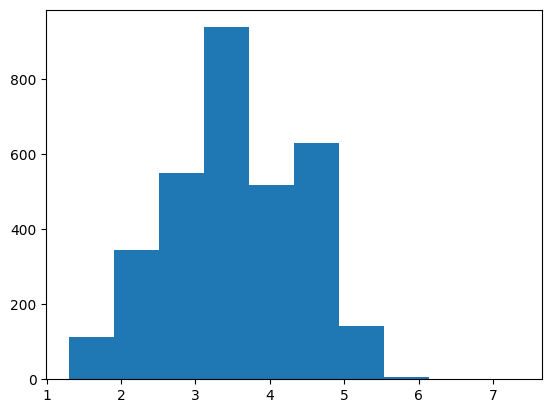

In [8]:
#Log transformation might help for GR and RT
# Logarithmic Transformation of GR
plt.hist(np.log(data['GR']))

(array([  11.,  513.,  391., 1294.,  653.,  257.,   80.,   23.,   17.,
           2.]),
 array([-2.3644605 , -1.51463777, -0.66481505,  0.18500767,  1.0348304 ,
         1.88465312,  2.73447584,  3.58429857,  4.43412129,  5.28394402,
         6.13376674]),
 <BarContainer object of 10 artists>)

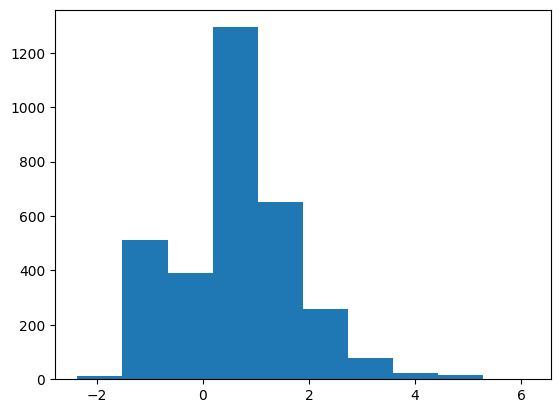

In [9]:
# Logarithmic Transformation of RT
plt.hist(np.log(data['RT']))

In [10]:
data['RT_log'] = np.log10(data.RT) # New feature
data['GR_log'] = np.log10(data.GR) # New feature

In [11]:
data.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RT_log,GR_log
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,SH,-0.230032,1.700868
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,UN,-0.109691,1.674372
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,SH,0.029668,1.694822
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,UN,0.160168,1.652366
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,UN,-0.020361,1.672142


In [12]:
data.drop('Well', axis= 1, inplace= True) #doesn't seem like well is a useful feature since it's dependent on sheet name

#one - hot encoding

df_encoded = pd.get_dummies(data, columns=['Facies'], dtype= int) #True is 1, False is 0
df_encoded.head()

,Depth,GR,RT,RHOB,NPHI,RT_log,GR_log,Facies_CB,Facies_SH,Facies_SS,Facies_UN
0,3178.5,50.2190,0.5888,2.3296,0.3657,-0.230032,1.700868,0,1,0,0
1,3179.0,47.2468,0.7768,2.3170,0.3776,-0.109691,1.674372,0,0,0,1
2,3179.5,49.5247,1.0707,2.2960,0.5390,0.029668,1.694822,0,1,0,0
3,3180.0,44.9124,1.4460,2.2514,0.5482,0.160168,1.652366,0,0,0,1
4,3180.5,47.0048,0.9542,2.2733,0.5076,-0.020361,1.672142,0,0,0,1


In [13]:
corr_pearson = df_encoded.corr(method='pearson')

corr_pearson

,Depth,GR,RT,RHOB,NPHI,RT_log,GR_log,Facies_CB,Facies_SH,Facies_SS,Facies_UN
Depth,1.000000,0.203918,0.022706,0.036966,0.058008,-0.076379,0.346693,-0.183036,0.207793,0.013720,-0.048832
GR,0.203918,1.000000,-0.058902,-0.061761,0.600947,-0.070969,0.763928,-0.413288,0.663951,-0.214836,0.031047
RT,0.022706,-0.058902,1.000000,-0.060824,-0.081006,0.505960,-0.111836,0.030273,-0.069225,0.049715,-0.036435
RHOB,0.036966,-0.061761,-0.060824,1.000000,-0.439035,0.397558,-0.190767,0.506655,0.044382,-0.549172,-0.066770
NPHI,0.058008,0.600947,-0.081006,-0.439035,1.000000,-0.266324,0.760594,-0.659833,0.674244,-0.016357,0.155258
RT_log,-0.076379,-0.070969,0.505960,0.397558,-0.266324,1.000000,-0.206197,0.321366,-0.004650,-0.305211,-0.070298
GR_log,0.346693,0.763928,-0.111836,-0.190767,0.760594,-0.206197,1.000000,-0.630412,0.748205,-0.097564,0.105065
Facies_CB,-0.183036,-0.413288,0.030273,0.506655,-0.659833,0.321366,-0.630412,1.000000,-0.480033,-0.527804,-0.157935
Facies_SH,0.207793,0.663951,-0.069225,0.044382,0.674244,-0.004650,0.748205,-0.480033,1.000000,-0.404083,-0.120914
Facies_SS,0.013720,-0.214836,0.049715,-0.549172,-0.016357,-0.305211,-0.097564,-0.527804,-0.404083,1.000000,-0.132947


Text(0.5, 1.0, 'Pearson Correlation Heatmap')

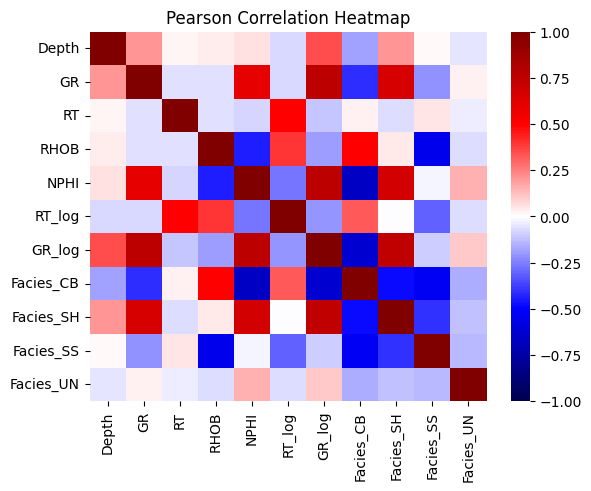

In [14]:
ax = sns.heatmap(corr_pearson, xticklabels=corr_pearson.columns, yticklabels=corr_pearson.columns, center=0, vmin=-1, vmax=1, cmap='seismic')

# Set the title of the heatmap
ax.set_title('Pearson Correlation Heatmap')

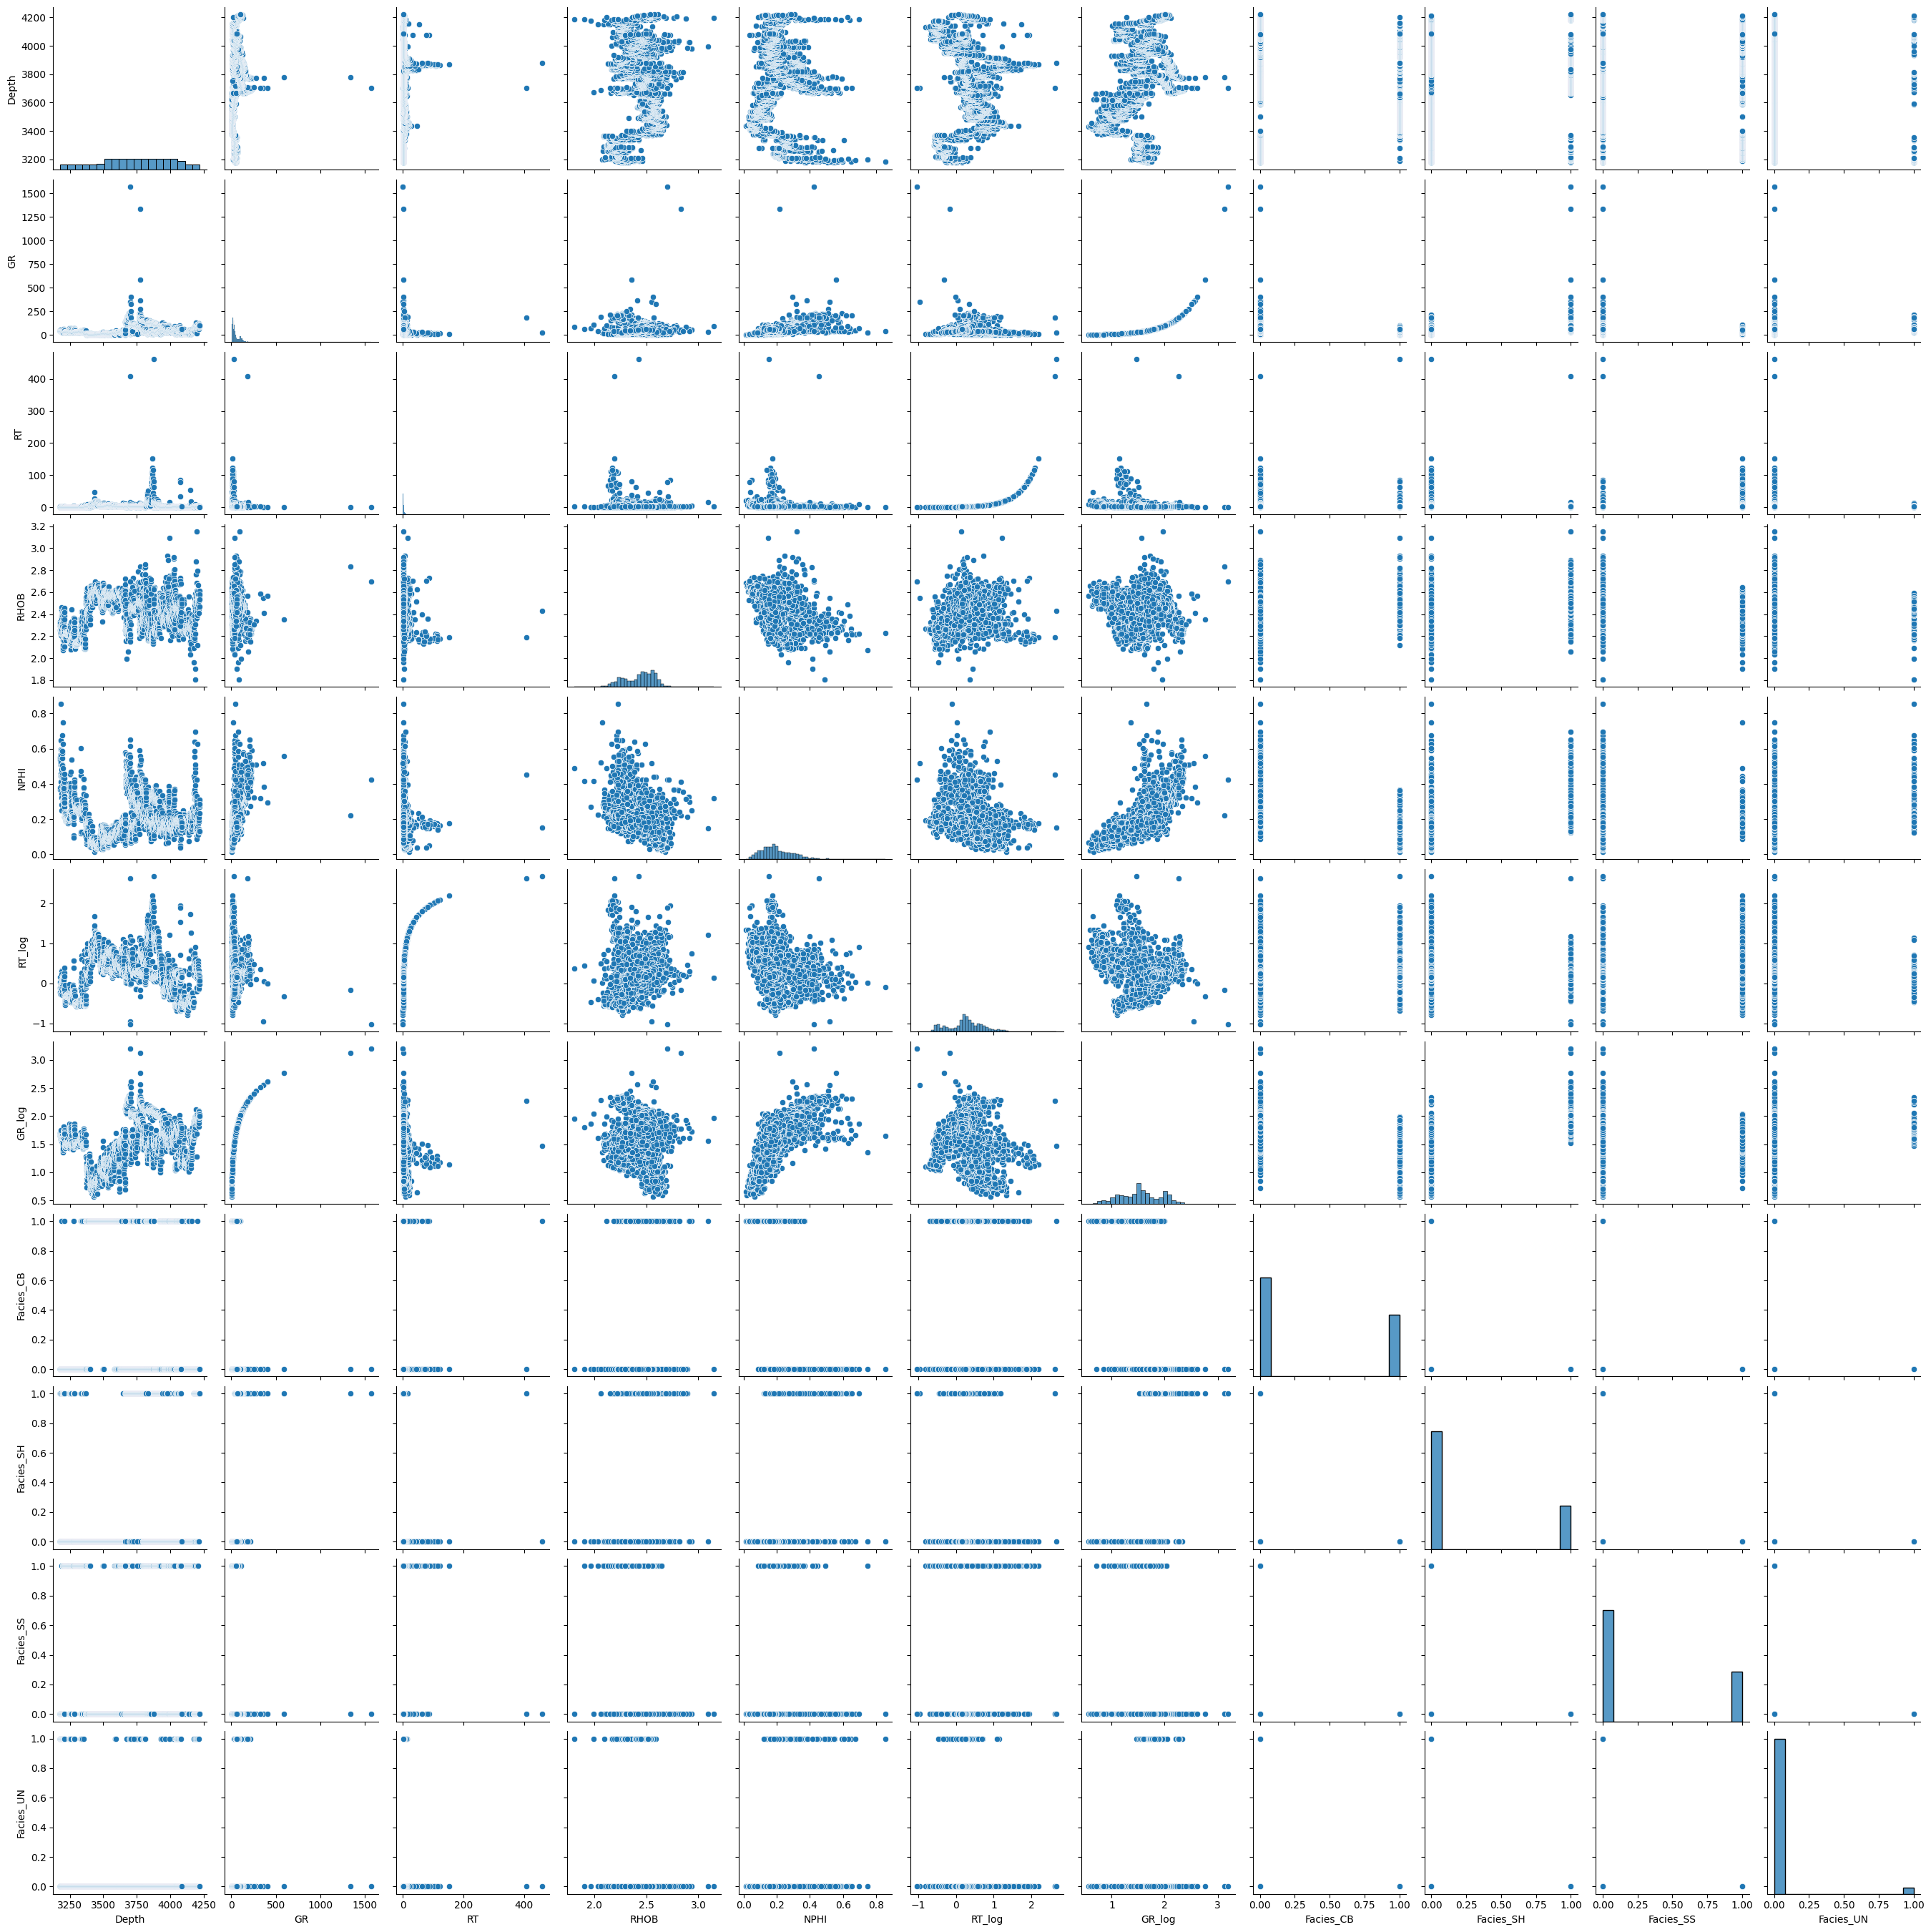

In [15]:
sns.pairplot(df_encoded)

In [16]:
# 2 more new features
df_encoded['Magnitude_GR_RT'] = np.sqrt(df_encoded['GR']**2 + df_encoded['RT']**2)
df_encoded['Angle_GR_RT'] = np.arctan2(df_encoded['RT'], df_encoded['GR'])

#dropping GR and RT since we have their log values
df_encoded.drop(['RT','GR'], inplace = True,axis = 1) # drop the original RT and GR

In [17]:
corr_pearson = df_encoded.corr(method='pearson')

corr_pearson

,Depth,RHOB,NPHI,RT_log,GR_log,Facies_CB,Facies_SH,Facies_SS,Facies_UN,Magnitude_GR_RT,Angle_GR_RT
Depth,1.000000,0.036966,0.058008,-0.076379,0.346693,-0.183036,0.207793,0.013720,-0.048832,0.206746,-0.214104
RHOB,0.036966,1.000000,-0.439035,0.397558,-0.190767,0.506655,0.044382,-0.549172,-0.066770,-0.078345,0.217746
NPHI,0.058008,-0.439035,1.000000,-0.266324,0.760594,-0.659833,0.674244,-0.016357,0.155258,0.582205,-0.480502
RT_log,-0.076379,0.397558,-0.266324,1.000000,-0.206197,0.321366,-0.004650,-0.305211,-0.070298,0.010789,0.739667
GR_log,0.346693,-0.190767,0.760594,-0.206197,1.000000,-0.630412,0.748205,-0.097564,0.105065,0.735379,-0.610170
Facies_CB,-0.183036,0.506655,-0.659833,0.321366,-0.630412,1.000000,-0.480033,-0.527804,-0.157935,-0.408175,0.399694
Facies_SH,0.207793,0.044382,0.674244,-0.004650,0.748205,-0.480033,1.000000,-0.404083,-0.120914,0.644603,-0.313072
Facies_SS,0.013720,-0.549172,-0.016357,-0.305211,-0.097564,-0.527804,-0.404083,1.000000,-0.132947,-0.199277,-0.080102
Facies_UN,-0.048832,-0.066770,0.155258,-0.070298,0.105065,-0.157935,-0.120914,-0.132947,1.000000,0.025352,-0.097850
Magnitude_GR_RT,0.206746,-0.078345,0.582205,0.010789,0.735379,-0.408175,0.644603,-0.199277,0.025352,1.000000,-0.227027


## Outlier Removal

In [18]:
df_encoded.shape

(3241, 11)

In [19]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(contamination = 0.05)

iforest.fit(df_encoded)

label = iforest.predict(df_encoded)

data_i = df_encoded[label == 1]

In [20]:
data_i.shape

(3079, 11)

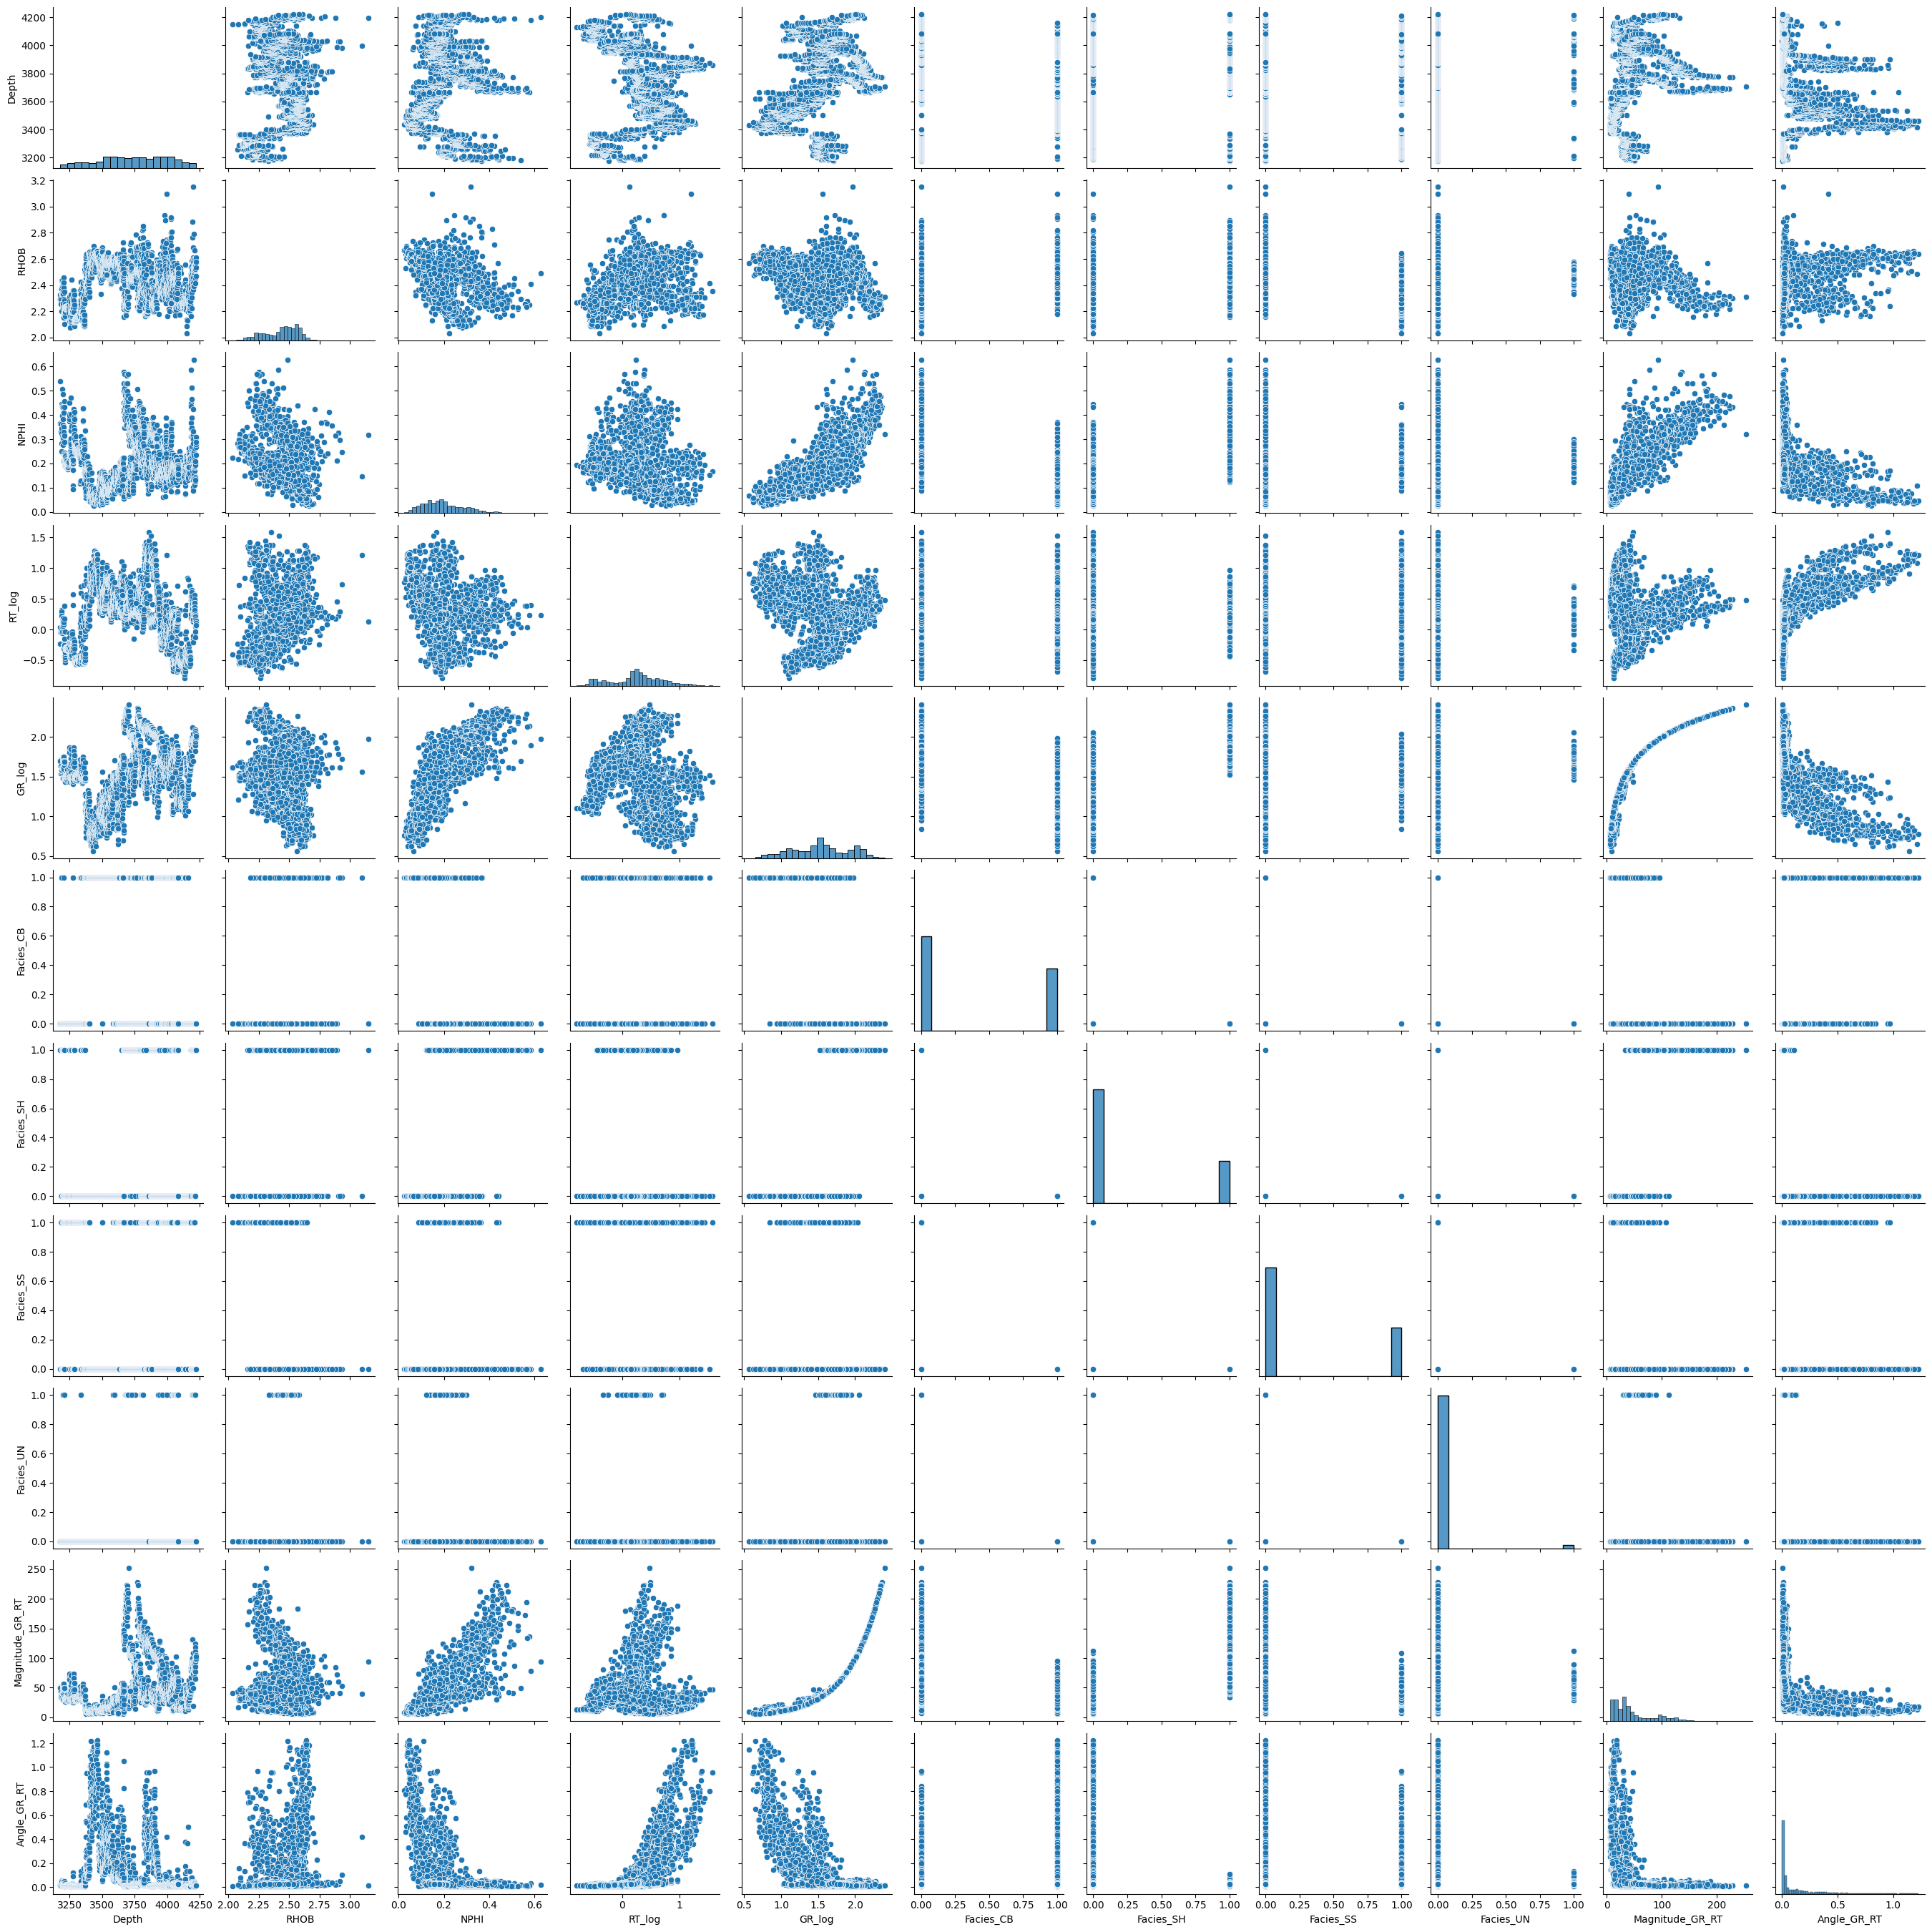

In [22]:
sns.pairplot(data_i)

## Scaling

In [23]:
data_i

,Depth,RHOB,NPHI,RT_log,GR_log,Facies_CB,Facies_SH,Facies_SS,Facies_UN,Magnitude_GR_RT,Angle_GR_RT
0,3178.5,2.3296,0.3657,-0.230032,1.700868,0,1,0,0,50.222452,0.011724
2,3179.5,2.2960,0.5390,0.029668,1.694822,0,1,0,0,49.536273,0.021616
15,3186.0,2.2860,0.3617,-0.024201,1.544188,0,0,1,0,35.022473,0.027009
17,3187.0,2.2582,0.3306,-0.042872,1.631196,0,0,1,0,42.785194,0.021177
18,3187.5,2.3742,0.3431,-0.009350,1.566916,0,0,1,0,36.903580,0.026524
...,...,...,...,...,...,...,...,...,...,...,...
1154,4083.5,2.4851,0.1416,0.245266,1.776018,1,0,0,0,59.731905,0.029453
1155,4084.0,2.4860,0.1416,0.217747,1.766539,1,0,0,0,58.440326,0.028255
1156,4084.5,2.5311,0.1527,0.203305,1.759660,1,0,0,0,57.521174,0.027767
1157,4085.0,2.4731,0.1785,0.170848,1.754234,1,0,0,0,56.804336,0.026093


In [24]:
# Import methods for scaling
from sklearn.preprocessing import StandardScaler

excluded_columns = ['Facies_CB', 'Facies_SH', 'Facies_SS', 'Facies_UN'] #boolean features, so not scaling them
df_to_scale = data_i.drop(columns=excluded_columns)
df_excluded = data_i[excluded_columns]

ss = StandardScaler()

ss.fit(df_to_scale) 
data_i_s = ss.transform(df_to_scale) 

df_scaled = pd.DataFrame(data_i_s, columns=df_to_scale.columns, index=df_to_scale.index)

df_scaled = pd.concat([df_scaled, df_excluded], axis=1)

In [25]:
df_scaled.head()

,Depth,RHOB,NPHI,RT_log,GR_log,Magnitude_GR_RT,Angle_GR_RT,Facies_CB,Facies_SH,Facies_SS,Facies_UN
0,-2.156563,-0.768671,1.739576,-1.090137,0.428707,0.007122,-0.589794,0,1,0,0
2,-2.152725,-1.004062,3.576129,-0.506195,0.412867,-0.009328,-0.544811,0,1,0,0
15,-2.127775,-1.074120,1.697186,-0.627319,0.018252,-0.357292,-0.520289,0,0,1,0
17,-2.123937,-1.268878,1.367603,-0.669302,0.246187,-0.171183,-0.546807,0,0,1,0
18,-2.122018,-0.456216,1.500072,-0.593928,0.077791,-0.312193,-0.522495,0,0,1,0


In [26]:
df_scaled.shape

(3079, 11)

## Collinearity

In [27]:
corr_pearson = df_scaled.corr(method='pearson')

corr_pearson
#Since threshold is 0.9, there are no features that exceed 0.9

,Depth,RHOB,NPHI,RT_log,GR_log,Magnitude_GR_RT,Angle_GR_RT,Facies_CB,Facies_SH,Facies_SS,Facies_UN
Depth,1.000000,0.025984,0.145367,-0.135669,0.378876,0.291060,-0.309758,-0.210134,0.214372,-0.013441,0.092271
RHOB,0.025984,1.000000,-0.418135,0.520335,-0.187534,-0.108082,0.336670,0.496975,0.042917,-0.578848,0.036090
NPHI,0.145367,-0.418135,1.000000,-0.269813,0.804213,0.800520,-0.560661,-0.689766,0.738109,0.024435,-0.012401
RT_log,-0.135669,0.520335,-0.269813,1.000000,-0.172236,-0.000227,0.682730,0.365187,0.024761,-0.405870,-0.013694
GR_log,0.378876,-0.187534,0.804213,-0.172236,1.000000,0.905264,-0.661690,-0.642076,0.759724,-0.076684,0.080240
Magnitude_GR_RT,0.291060,-0.108082,0.800520,-0.000227,0.905264,1.000000,-0.432258,-0.536307,0.851924,-0.259506,0.025196
Angle_GR_RT,-0.309758,0.336670,-0.560661,0.682730,-0.661690,-0.432258,1.000000,0.495020,-0.335934,-0.177181,-0.073717
Facies_CB,-0.210134,0.496975,-0.689766,0.365187,-0.642076,-0.536307,0.495020,1.000000,-0.494430,-0.543118,-0.123728
Facies_SH,0.214372,0.042917,0.738109,0.024761,0.759724,0.851924,-0.335934,-0.494430,1.000000,-0.408075,-0.092964
Facies_SS,-0.013441,-0.578848,0.024435,-0.405870,-0.076684,-0.259506,-0.177181,-0.543118,-0.408075,1.000000,-0.102118


<Axes: >

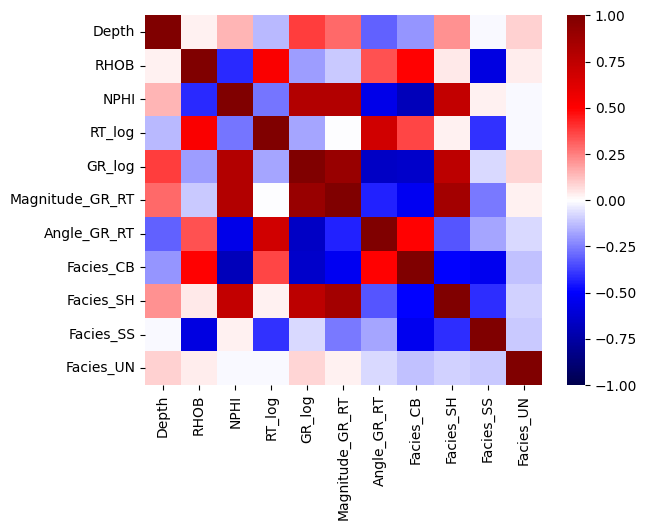

In [28]:
sns.heatmap(corr_pearson, xticklabels=corr_pearson.columns, yticklabels=corr_pearson.columns,center=0, vmin=-1, vmax=1,cmap='seismic')

## Association Test

In [29]:
#Reversing the one-hot encoding on the target since data preprocessing ie scaling and computing correlation is done

facies_columns = ['Facies_CB', 'Facies_SH', 'Facies_SS', 'Facies_UN']
facies_labels = ['CB', 'SH', 'SS', 'UN']

df_scaled['Facies'] = df_scaled[facies_columns].idxmax(axis=1).str.replace('Facies_', '')
df_scaled.drop(columns= facies_columns, inplace= True, axis = 1)

In [30]:
df_scaled.head()

,Depth,RHOB,NPHI,RT_log,GR_log,Magnitude_GR_RT,Angle_GR_RT,Facies
0,-2.156563,-0.768671,1.739576,-1.090137,0.428707,0.007122,-0.589794,SH
2,-2.152725,-1.004062,3.576129,-0.506195,0.412867,-0.009328,-0.544811,SH
15,-2.127775,-1.074120,1.697186,-0.627319,0.018252,-0.357292,-0.520289,SS
17,-2.123937,-1.268878,1.367603,-0.669302,0.246187,-0.171183,-0.546807,SS
18,-2.122018,-0.456216,1.500072,-0.593928,0.077791,-0.312193,-0.522495,SS


In [31]:
from sklearn.feature_selection import f_classif, mutual_info_classif
#Classification problem, so F_classif and mi classif
X = df_scaled.drop(columns= ['Facies'], axis = 1)
Y = df_scaled[['Facies']]

In [32]:
Y.shape

(3079, 1)

In [33]:
X.shape

(3079, 7)

In [34]:
F, p = f_classif(X, Y) #computing F score and p from train data and target
mi = mutual_info_classif(X, Y, random_state = 42) 

Text(0.5, 0, 'features')

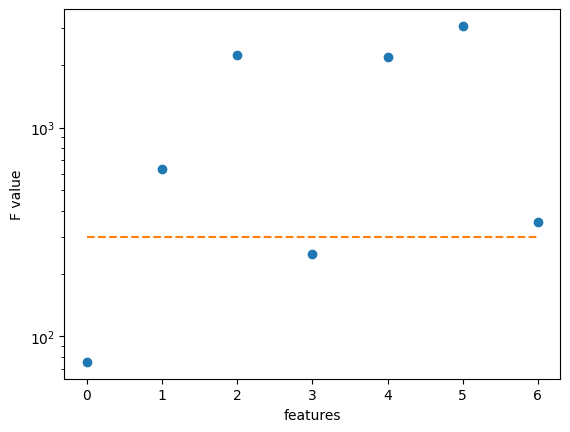

In [35]:
#Plot for F
plt.figure()
plt.plot(F, 'o')
plt.semilogy(300*np.ones(len(F)), '--') 
plt.ylabel('F value')
plt.xlabel('features')

Text(0.5, 0, 'features')

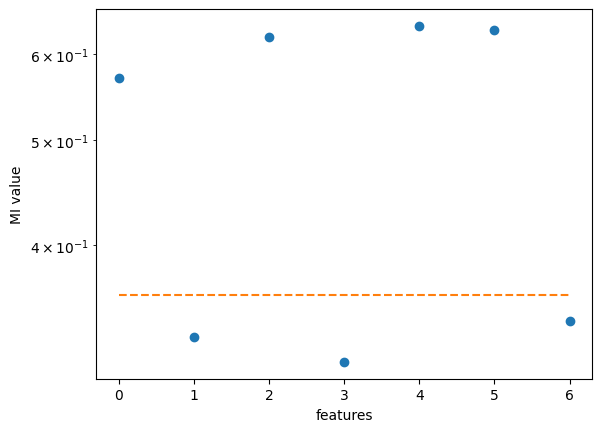

In [36]:
#Plot for MI
plt.figure()
plt.plot(mi, 'o')
plt.semilogy(0.36*np.ones(len(mi)), '--') 
plt.ylabel('MI value')
plt.xlabel('features')

Text(0.5, 0, 'features')

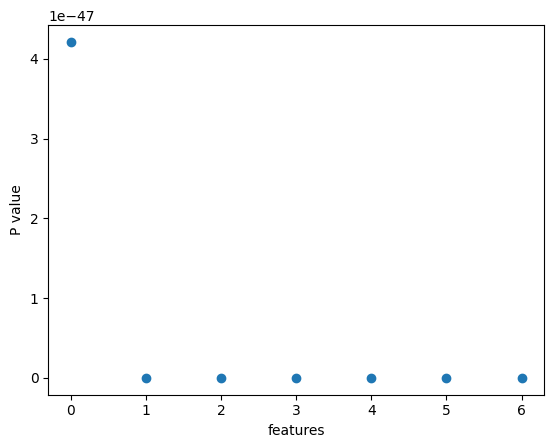

In [37]:
#Plot for P
plt.figure()
plt.plot(p, 'o')
# plt.semilogy(0.33*np.ones(len(mi)), '--') 
plt.ylabel('P value')
plt.xlabel('features')

In [38]:
#Not using p value since most of the features don't have a high p value, considering we have to do PCA afterwards

#choosing features with F score greater than 300 or mi greater than 0.36
mask = (F>300)|(mi>0.36)
print('no. of significant features from scaled data post f and mi filter: {}'.format(len(p[mask]))) 

no. of significant features from scaled data post f and mi filter: 6


In [39]:
#Creating data after f and mi filter using the mask
x_assoc = X.iloc[:, mask]
print('X post f and mi filter= ', x_assoc.shape)

X post f and mi filter=  (3079, 6)


In [40]:
#Pickling the mask

fileMask = 'Deploy_Association_Test.sav'

pickle.dump(mask, open(fileMask, 'wb'))

## Feature Transformation- Quantile Transform

In [41]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=100, output_distribution='uniform', random_state=42)

x_assoc_transformed = qt.fit_transform(x_assoc)

In [42]:
# Checking the shape and perhaps the first few rows to verify everything went as expected
print("Transformed features shape:", x_assoc_transformed.shape)

#Convert back to a DataFrame for further use with column names
x_assoc_transformed_df = pd.DataFrame(x_assoc_transformed, columns=x_assoc.columns, index=x_assoc.index)
x_assoc_transformed_df.head()

Transformed features shape: (3079, 6)


,Depth,RHOB,NPHI,GR_log,Magnitude_GR_RT,Angle_GR_RT
0,0.000000,0.252125,0.943382,0.677813,0.677750,0.116650
2,0.000301,0.202541,0.994731,0.672571,0.672403,0.388105
15,0.002255,0.188211,0.940346,0.523338,0.515710,0.469076
17,0.002556,0.144987,0.897248,0.619073,0.616867,0.379801
18,0.002706,0.307756,0.917982,0.552724,0.543986,0.463611


## Clustering Labels

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_assoc_transformed_df, Y, test_size=0.2, random_state=42, stratify= Y)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2463, 6)
(616, 6)
(2463, 1)
(616, 1)


In [44]:
from sklearn.cluster import KMeans

def elbow_plot(X, n):
    """Inputs:
        X (2-D Array): Feature Matrix for clustering
        
        n (int): Number of clusters to consider
        
        Outputs: Elbow Plot
    """
    sns.set()
    inertia = []
    sil_score = []
    for i in range(n):
        kmeans = KMeans(n_clusters = i+1)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_) ## calculated for each value of K

    x = np.arange(n) + 1
    
    plt.figure(figsize = (12,8))
    plt.plot(x, inertia, '-o')
    plt.xlabel('Number of Clusters', fontsize = 15)
    plt.ylabel('Inertia', fontsize = 15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title('Elbow Plot')

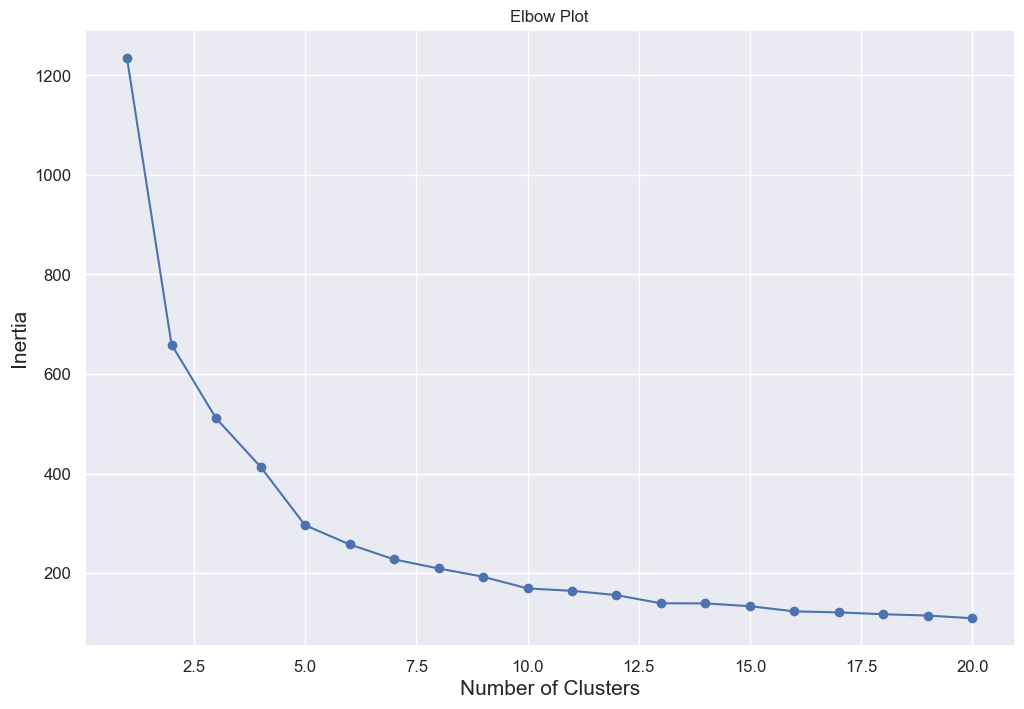

In [45]:
elbow_plot(X_train, 20)

In [46]:
#Second clustering technique I've chosen is Meanshift

from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X_train, quantile=.17)
bandwidth

0.5359024993775242

In [47]:
#From elbow method, looks like the ideal number of clusters is 5

kmeans = KMeans(n_clusters=5, random_state=42)

# Apply Mean Shift with the estimated bandwidth
mean_shift = MeanShift(bandwidth=bandwidth)

# Fit on training data
kmeans.fit(X_train)
mean_shift.fit(X_train)

# Generate cluster labels for training data
train_kmeans_labels = kmeans.labels_
# Get cluster labels for training data
train_meanshift_labels = mean_shift.labels_

# Apply clustering model to generate labels for testing data
test_kmeans_labels = kmeans.predict(X_test)
test_meanshift_labels = mean_shift.predict(X_test)

# Append cluster labels as new features to the original train and test data
X_train['cluster_kmeans'] = train_kmeans_labels
X_test['cluster_kmeans'] = test_kmeans_labels
X_test['cluster_meanshift'] = test_meanshift_labels
X_train['cluster_meanshift'] = train_meanshift_labels

In [48]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2463, 8)
(616, 8)
(2463, 1)
(616, 1)


## ML Algorithms and Distributions

From the Train_Test jupyter notebook, we have concluded that the 4 best performing models are:

- Random Forest
- Gradient Boosting
- Neural Network
- K-Nearest Neighbors (KNN)

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import label_binarize

# Function to perform hyperparameter tuning and evaluation
def run_experiment(model, param_grid, iterations=30):
    f1_scores_mem = []
    f1_scores_gen = []
    auc_scores_gen = []
    
    for _ in range(iterations):
        grid = GridSearchCV(model, param_grid, cv = 2, verbose=1)
        grid.fit(X_train, Y_train)
        
        best_model = grid.best_estimator_
        y_pred_train = best_model.predict(X_train)
        y_pred_test = best_model.predict(X_test)
        
        # Memorization Performance
        f1_mem = f1_score(Y_train, y_pred_train, average='weighted')
        f1_scores_mem.append(f1_mem)
        
        # Generalization Performance
        f1_gen = f1_score(Y_test, y_pred_test, average='weighted')
        f1_scores_gen.append(f1_gen)
        
        # AUC Score Generalization
        # Ensure to use probabilities for all classes
        Y_test_binarized = label_binarize(Y_test, classes=np.unique(Y_train))
        y_proba_test = best_model.predict_proba(X_test)
        auc_gen = roc_auc_score(Y_test_binarized, y_proba_test, multi_class='ovo')
        auc_scores_gen.append(auc_gen)
    
    return f1_scores_mem, f1_scores_gen, auc_scores_gen

In [65]:
#Param grids already used in the Train-Test notebook
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 6],
    'min_samples_leaf': [2, 4, 6]
}
param_grid_gb = {
    'n_estimators': [50, 70, 90],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],  # reasonable values to test, can adjust based on dataset size
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']  # commonly used metrics
}
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Different configurations of layers and neurons
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [300, 1000]  # Increased iterations for convergence
}

In [66]:
# Run experiments for each technique
results_rf = run_experiment(RandomForestClassifier(), param_grid_rf)
results_gb = run_experiment(GradientBoostingClassifier(), param_grid_gb)
results_knn = run_experiment(KNeighborsClassifier(), param_grid_knn)
results_nn = run_experiment(MLPClassifier(), param_grid_nn)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
Fitting 2 folds for each of 108 candidates, totalling 216 fits
Fitting 2 folds for each of 108 candidates, totalling 216 fits
Fitting 2 folds for each of 108 candidates, totalling 216 fits
Fitting 2 folds for each of 108 candidates, totalling 216 fits
Fitting 2 folds for each of 108 candidates, totalling 216 fits
Fitting 2 folds for each of 108 candidates, totalling 216 fits
Fitting 2 folds for each of 108 candidates, totalling 216 fits
Fitting 2 folds for each of 108 candidates, totalling 216 fits
Fitting 2 folds for each of 108 candidates, totalling 216 fits
Fitting 2 folds for each of 108 candidates, totalling 216 fits
Fitting 2 folds for each of 108 candidates, totalling 216 fits
Fitting 2 folds for each of 108 candidates, totalling 216 fits
Fitting 2 folds for each of 108 candidates, totalling 216 fits
Fitting 2 folds for each of 108 candidates, totalling 216 fits
Fitting 2 folds for each of 108 candidates, totalling 2

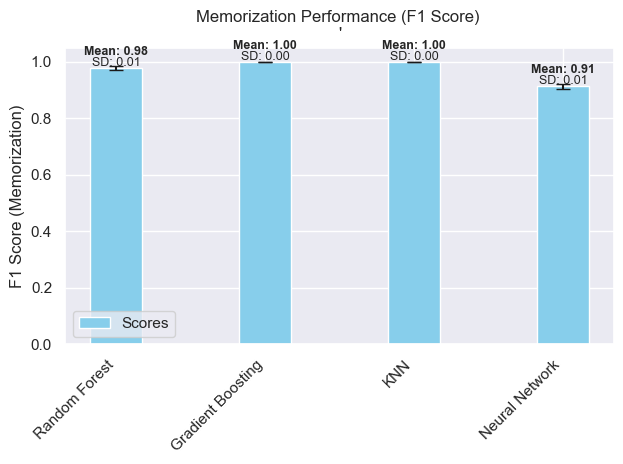

In [72]:
def plot_performance(results, labels, metric_name, y_label, title):
    means = [np.mean(scores) for scores in results]
    stds = [np.std(scores) for scores in results]
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects = ax.bar(x, means, width, yerr=stds, label='Scores', capsize=5, color='skyblue')
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.legend()

    # Adding mean and std as labels on each bar with offsetting to avoid overlap
    for rect, mean, std in zip(rects, means, stds):
        height = rect.get_height()
        # Offset the annotations to reduce overlap, adjust these based on your data range
        offset = height / 100
        ax.annotate(f'Mean: {mean:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height - offset),
                    xytext=(0, 9),  # nudge the text up a bit
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9, fontweight='bold')
        ax.annotate(f'SD: {std:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height - 2 * offset),
                    xytext=(0, 3),  # nudge the text up a bit
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

    fig.tight_layout()
    plt.show()

# Example data setup and function call
mem_f1_scores = [results_rf[0], results_gb[0], results_knn[0], results_nn[0]]
labels = ['Random Forest', 'Gradient Boosting', 'KNN', 'Neural Network']
plot_performance(mem_f1_scores, labels, 'F1 Score', 'F1 Score (Memorization)', "Memorization Performance (F1 Score) \n'")

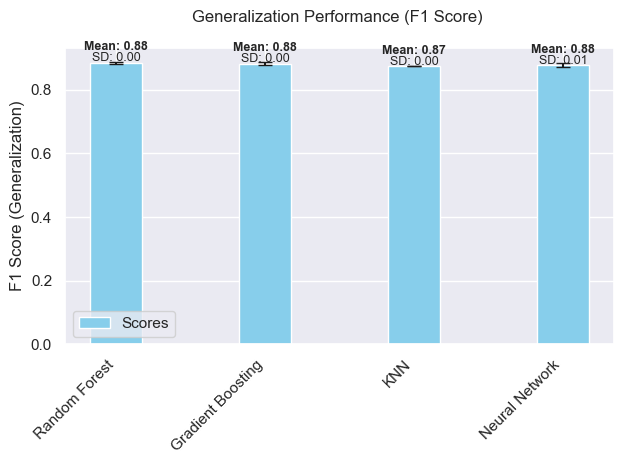

In [73]:
gen_f1_scores = [results_rf[1], results_gb[1], results_knn[1], results_nn[1]]

plot_performance(gen_f1_scores, labels, 'F1 Score', 'F1 Score (Generalization)', "Generalization Performance (F1 Score) \n")

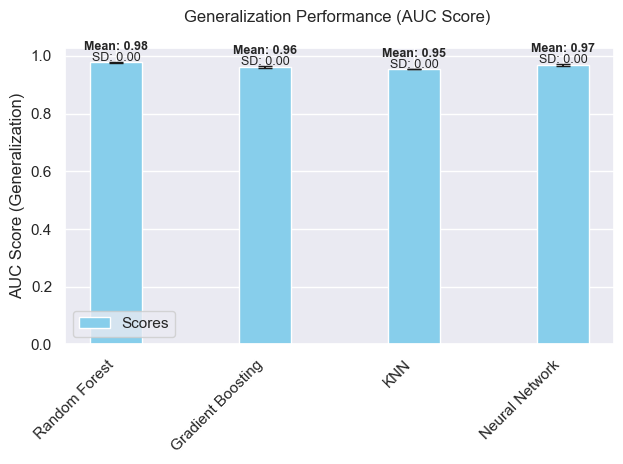

In [74]:
gen_auc_scores = [results_rf[2], results_gb[2], results_knn[2], results_nn[2]]

plot_performance(gen_auc_scores, labels, 'AUC Score', 'AUC Score (Generalization)', "Generalization Performance (AUC Score) \n")

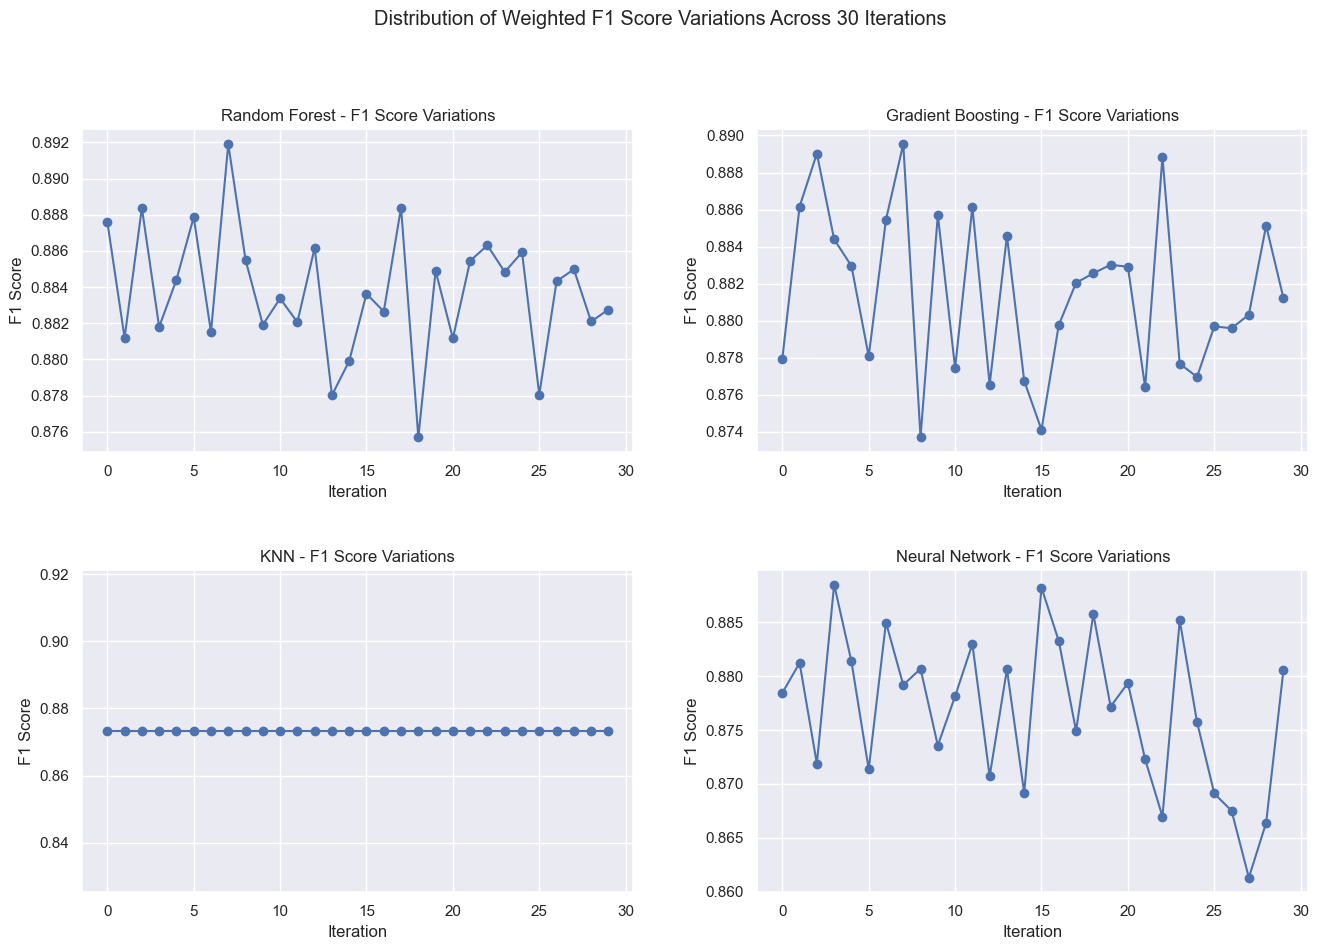

In [77]:
import matplotlib.pyplot as plt
import numpy as np

def plot_f1_score_variations_separate(f1_scores, labels, title):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Set up a 2x2 grid of subplots
    fig.suptitle(title)

    # Flatten the array of axes for easier iteration
    axs = axs.ravel()
    
    for i, (scores, label) in enumerate(zip(f1_scores, labels)):
        axs[i].plot(scores, marker='o', linestyle='-')  # Line plot with points marked
        axs[i].set_title(f'{label} - F1 Score Variations')
        axs[i].set_xlabel('Iteration')
        axs[i].set_ylabel('F1 Score')
        axs[i].grid(True)  # Enable grid for better readability

    plt.tight_layout(pad=3.0)  # Adjust layout to prevent overlap
    plt.show()

# Assuming weighted f1 score can be used to quantify generalization 
f1_scores_gen = [results_rf[1], results_gb[1], results_knn[1], results_nn[1]]
labels = ['Random Forest', 'Gradient Boosting', 'KNN', 'Neural Network']

plot_f1_score_variations_separate(f1_scores_gen, labels, "Distribution of Weighted F1 Score Variations Across 30 Iterations")

## Question- Based on all the plots generated, which is the most reliable technique?

### Analysis of Variability in Performance

#### K-Nearest Neighbors (KNN)
- Memorization and Generalization F1 Score: Shows remarkably stable performance across iterations with very little variance in both memorization and generalization.
- AUC Score: Again, very stable, indicative of consistent performance across different runs.
#### Neural Network
- Memorization and Generalization F1 Score: Exhibits high variance in generalization scores, indicating potential sensitivity to initial conditions or overfitting to training data in some iterations.
- AUC Score: Also shows variability but maintains high performance.
#### Random Forest
- Memorization and Generalization F1 Score: Displays moderate variance in generalization performance, suggesting some dependency on the initialization or data splits, but less so than Neural Networks.
- AUC Score: High and relatively stable performance.
#### Gradient Boosting
- Memorization and Generalization F1 Score: Moderate variability similar to Random Forest but generally stable and high performance.
- AUC Score: Shows high performance with slight variations.

### Assessing Reliability

When considering reliability, we looked for techniques that show consistent performance across iterations, both in terms of mean performance and low variability (standard deviation).

- KNN stands out as the most reliable technique in this comparison, showing the least variance across all measured metrics. Its scores are consistently high across iterations for both memorization and generalization. This consistency is crucial in real-world applications where the ability to perform predictably under varying conditions is valued.
- Random Forest and Gradient Boosting are close contenders, demonstrating good performance with somewhat higher but acceptable variability. They offer robustness but with more noticeable fluctuations in some runs compared to KNN.
- Neural Networks, while potentially powerful, show significant swings in performance across iterations, which might indicate sensitivity to initialization and a higher likelihood of overfitting compared to other techniques.

Based on our analysis, **K-Nearest Neighbors** is recommended as the most reliable technique due to its stable performance across multiple runs and metrics.